In [1]:
from helper import *
from data import *
from models import *

%matplotlib inline 
import matplotlib.pyplot as plt
# plt.rcParams['font.sans-serif']=['SimHei']
# plt.rcParams['axes.unicode_minus']=False 
pd.set_option('display.max_rows', 100)    
pd.set_option('display.max_colwidth', 100)    

%load_ext autoreload
%autoreload 2

data_path = os.getcwd() + "/data"

In [2]:
qa_edit = pd.read_csv(os.path.join(data_path, "qa_edit.csv")).dropna()
print(qa_edit.shape)
qa_edit = qa_edit.drop_duplicates(subset=['参考答案', '坐席回复'])
print(qa_edit.shape)

(123321, 4)
(37214, 4)


In [48]:
qa_edit['参考答案长度'] = qa_edit['参考答案'].apply(lambda x: len(x))
qa_edit['坐席回复长度'] = qa_edit['坐席回复'].apply(lambda x: len(x))
qa_edit['len_dif'] = qa_edit.loc[:,'参考答案长度']-qa_edit.loc[:,'坐席回复长度']
qa_edit['len_dif'] = qa_edit['len_dif'].apply(lambda x: abs(x))
qa_edit['len_percent'] = qa_edit[['参考答案长度','坐席回复长度']].apply(lambda x: float(x[1])/x[0], axis=1)

In [49]:
display(qa_edit.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]))

,参考答案长度,坐席回复长度,len_dif,inter_rate,selflap_rate,len_percent
count,27219.000000,27219.000000,27219.000000,27219.000000,27219.000000,27219.000000
mean,67.926889,35.216981,36.036702,0.392075,0.642368,0.626727
std,33.511229,29.566147,33.881715,0.358432,0.344831,0.665433
min,2.000000,6.000000,0.000000,0.000000,0.000000,0.041379
1%,8.000000,6.000000,0.000000,0.000000,0.000000,0.059322
25%,42.000000,13.000000,6.000000,0.060606,0.307692,0.223529
50%,67.000000,25.000000,27.000000,0.267717,0.740741,0.526316
75%,89.000000,49.000000,58.000000,0.727273,0.987878,0.977528
99%,141.820000,127.000000,123.820000,1.000000,1.000000,2.319791
max,149.000000,398.000000,374.000000,1.000000,1.000000,44.500000


In [50]:
qa_edit = qa_edit[ (qa_edit['参考答案长度']<150) & (qa_edit['坐席回复长度']>5)]

In [51]:
print(qa_edit.shape)
display(qa_edit.sample(n=5))

(27219, 10)


,用户问题,参考答案,坐席回复,回复类型,参考答案长度,坐席回复长度,len_dif,inter_rate,selflap_rate,len_percent
21762,好 要是换货 把东西拿走 给我个什么凭证吗,商品出现非人为质量问题以及支持无理由退换货的商品可自助申请退换货自实际收货日期的次日起7天内退货有质量问题15天内可换货可[linkurl=]找到对应的商品进行办理换货仅限于更换同种商品哦如想...,亲您可以直接在我的订单申请退换货呢,编辑后采用,115,17,98,0.081967,0.588235,0.147826
92553,苏宁试用在哪看？,亲亲是这样的这个商品一经确认收货并开机使用后一旦发现有质量问题需要去当地的售后网点做检测并由售后开具质量检测单并同意退换货之后检测完需拍照检测单上传给我司客服核实在规定的退换货周期内7天退货1...,亲我的易购我的试用,编辑后采用,139,9,130,0.042254,0.666667,0.064748
78681,是全新的手机吗,亲完全可以放心购买的苏宁易购上的商品均是厂家原包装发货保证正品行货带正规机打发票享受国家三包服务质量和售后服务与门店完全相同,完全可以放心购买的苏宁易购上的商品均是厂家原包装发货保证正品行货带正规机打发票享受国家三包服务质量和售后服务与门店完全相同的呢,编辑后采用,62,63,1,0.953125,0.968254,1.016129
15047,购物券过期了，可以延期么,您好亲优惠券都是有使用时间限制的若是补差券过期或由于我司无货而无法使用券购买导致的券过期可以等到后期有货了来找我们帮您激活券再次使用哦,您好亲优惠券都是有使用时间限制的这边查询一下,编辑后采用,67,22,45,0.219178,0.727273,0.328358
24894,花洒也是咱们安装吗,下单时[页面商品及服务信息]可以确认安装服务方下单后可通过以下链接[linkurl=]确认服务信息或预约更改服务时间商家安装问题请优先联系商家客服,您好具体是需要看商品,编辑后采用,73,10,63,0.024691,0.200000,0.136986


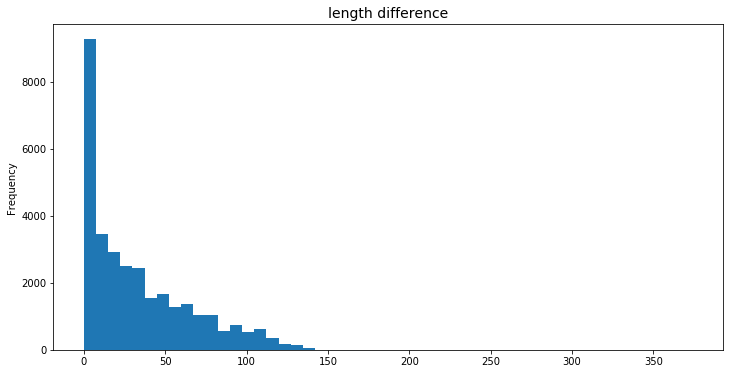

In [7]:
plt.figure(figsize=(12,6))
plt.title("length difference", fontsize=14)
ax1 = qa_edit['len_dif'].plot(kind='hist', bins=50)

In [8]:
greeting_answers = ['不客气亲爱哒很高兴为您服务感谢您对苏宁易购的支持如果您对我的服务满意记得给我个赞哈', '不客气亲爱的应该的哈',
                   'Hio￣▽￣)ブ很乐意为您效劳', '感谢您对苏宁易购的支持祝您生活愉快再见-', '不客气亲爱哒感谢您对我们的支持',
                   '好嘞','生气是魔鬼不要生气了亲爱的啦', '您稍等哈马上帮您查询核实', ')嘻嘻', '好的亲请问还有其他什么可以帮您的吗',
                   '好的还有什么可以帮您的吗', '很抱歉没有帮到您您可以点此转人工为您服务转人工','您好请问关于这款商品有什么可以帮到您',
                   '亲亲别生气别生气生活如此多娇给您带来不便十分抱歉呢','感谢您对苏宁易购的支持祝您生活愉快',
                   'Hio￣▽￣)ブ有任何问题都可以咨询我哦']

In [9]:
# qa_edit.sample(n=100)

In [10]:
qa_edit = qa_edit[~qa_edit['参考答案'].isin(greeting_answers)]
print(qa_edit.shape)

(27219, 7)


In [11]:
def intersection_rate(s1, s2):
    count1 = collections.Counter(s1)
    count2 = collections.Counter(s2)
    return sum((count1&count2).values())/sum((count1|count2).values())

def selflap_rate(s1, s2):
    count1 = collections.Counter(s1)
    count2 = collections.Counter(s2)
    return sum((count1&count2).values())/sum((count2).values())

In [12]:
qa_edit['inter_rate'] = qa_edit[['参考答案', '坐席回复']].apply(lambda x: intersection_rate(x[0], x[1]), axis=1)
qa_edit['selflap_rate'] = qa_edit[['参考答案', '坐席回复']].apply(lambda x: selflap_rate(x[0], x[1]), axis=1)

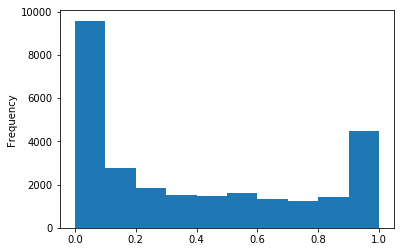

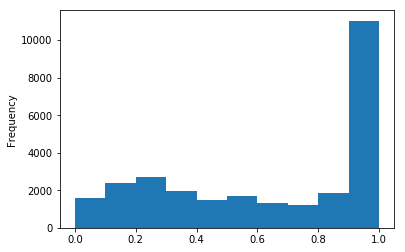

In [13]:
qa_edit.inter_rate.plot(kind='hist')
plt.show()
qa_edit.selflap_rate.plot(kind='hist')
plt.show()

In [60]:
qa_edit_lowInter = qa_edit[(qa_edit.inter_rate<0.8) & (qa_edit.selflap_rate<0.7)& (qa_edit['坐席回复长度']>5) | (qa_edit['len_percent']<0.3)]
print(qa_edit_lowInter.shape)

(14849, 10)


In [61]:
qa_edit_lowInter.sample(n=100)

,用户问题,参考答案,坐席回复,回复类型,参考答案长度,坐席回复长度,len_dif,inter_rate,selflap_rate,len_percent
66306,怎么领不了新人券,首次下载苏宁易购app并注册新人会员领取199元新人专享大礼包点击可扫码下载,是实名认证吗,编辑后采用,38,6,32,0.000000,0.000000,0.157895
5946,上门回收后，24小时内易付宝线上给您打款。邮寄回收的前往我的易购-我的服务-以旧换新-我的-我的订单查看进度。邮寄需要时间请耐心等等哦。,上门回收取件后拖机回站点检测后24小时内易付宝线上给您打款订单可在电脑端：在以旧换新里面我的订单查询以旧换新进度手机端：我的易购-我的服务-以旧换新-我的-我的订单查看进度,亲亲您在首页搜索不能冰箱就可以的呢,编辑后采用,86,17,69,0.051020,0.294118,0.197674
62860,贴背可以吗,苏宁已暂停免费贴膜服务但依然提供免费“贴”的服务您可以带着手机和膜前往苏宁门店有专业的贴膜人员帮您贴呢,稍等我帮您看下的亲,编辑后采用,51,9,42,0.052632,0.333333,0.176471
40930,你好，这剃须刀可以全身水洗吗,全身水洗是全机可以用水流冲洗清洁但不能长时间在水中浸泡短短的几分钟不影响产品的使用功能,稍等我帮您看下的亲,编辑后采用,43,9,34,0.019608,0.111111,0.209302
66176,什么时候能到,【苏宁发货】商品页面会显示预计到达时间以提交订单时显示的时间为准下单后按照您指定的日期配送非苏宁发货商品下单后在48小时内发货以快递信息为准下单后在订单中心查询物流动态,亲是申请贵就赔吗,编辑后采用,84,8,76,0.000000,0.000000,0.095238
82431,， 这抢购价多少钱？,您好所有的优惠活动可以关注易购主页或商品购买页的【促销活动】栏会有领券满减赠品等活动具体活动以页面为准优惠后的价格以支付时为准无法手动给您直接调价的哈,亲现在价格还不知道的,编辑后采用,75,10,65,0.036585,0.300000,0.133333
74870,什么时候可以退款,商品退货完成后资金原路退回因不同支付方式退款到账周期不同麻烦耐心等待退款到账详细的退款周期可[linkurl=]进行了解,商品退货完成后资金原路退回,编辑后采用,60,13,47,0.216667,1.000000,0.216667
7065,价格和网上一样的吗！,线上和线下因为销售渠道不同活动也是有所区别哦,线上和线下因为销售渠道不同活动也是有所区别哦价格以您门店咨询为准的呢,编辑后采用,22,34,12,0.647059,0.647059,1.545455
94829,那我不需要了，你帮我申请退款。,非常抱歉哦亲亲在线这边给您查看下呢亲您稍等片刻呢稍等后回复您哦,非常抱歉哦亲亲在,编辑后采用,31,8,23,0.258065,1.000000,0.258065
105914,你是人工客服,是或不是机器人就在那里是或者不是都可以快速为您解决问题人见人爱车见车载花见花开的人Sunny,亲已为您催货,编辑后采用,46,6,40,0.040000,0.333333,0.130435


In [62]:
qa_edit_lowInter = qa_edit_lowInter.sort_values('参考答案')
n = qa_edit_lowInter.shape[0]
split = list(range(int(0.1*n), n, int(0.1*n)))[:-1]

In [63]:
for i, fi in enumerate(np.split(qa_edit_lowInter[['用户问题', '参考答案', '坐席回复']], split)):
    fi.to_excel(os.path.join(data_path, "qa_data", "qalow{}.xlsx".format(i)), index=False, encoding='utf_8_sig')

In [64]:
qa_edit_highInter = qa_edit[(qa_edit.inter_rate>0.8) | (qa_edit.selflap_rate>0.7) & (qa_edit['坐席回复长度']>5) &(qa_edit['len_percent']>0.3)]

In [65]:
print(qa_edit_highInter.shape)

(12322, 10)


In [66]:
qa_edit_highInter.sample(n=100)

,用户问题,参考答案,坐席回复,回复类型,参考答案长度,坐席回复长度,len_dif,inter_rate,selflap_rate,len_percent
13868,在你们苏宁买奶粉有赠品没,赠品送货都是以页面描述为准的如您符合活动规则超期未收到赠品咨询人工客服为您查询；如果您购买第三方商家商品需要联系掌柜的哟,赠品送货都是以页面描述为准的这款没有的呢,编辑后采用,60,20,40,0.230769,0.750000,0.333333
17837,投诉电话是多少,亲苏宁热线是4008-365-365您有什么问题这边也是可以帮您处理的呢,您好苏宁热线是4008-365-365您有什么问题这边也是可以帮您处理的呢,编辑后采用,36,37,1,0.921053,0.945946,1.027778
95128,不是,嗯嗯那是怎样的呢,嗯嗯那是怎样的呢亲,编辑后采用,8,9,1,0.888889,0.888889,1.125000
56921,这个写得，免邮啊,您好苏宁自营商品单笔订单实际支付金额满86元免收基础运费不满86元是需要5元运费的自提是免运费续重运费规则可在【我的易购】-【我的服务】-【配送政策查询】查询商家订单运费以下单时为准,您好苏宁自营商品单笔订单实际支付金额满86元免收基础运费不满86元是需要5元运费的自提是免运费参加拼团乐拼购就是免运费的,编辑后采用,91,60,31,0.510000,0.850000,0.659341
58681,门店打印电子发票吗,电子发票会在确认收货后48小时内开具可以url=软件打开,亲电子发票会在确认收货后48小时内开具可以url=软件打开,编辑后采用,28,29,1,0.965517,0.965517,1.035714
84482,如果我在一个店铺选择门店支付 我去门店之前需要带什么吗,亲亲您可以选择门店支付下单选择“门店付款”24小时内尽快到当地就近门店提供订单号或者是手机号进行支付支付完成后第一时间为您安排发货若支付时发生价格或者库存等变化无法支付成功哦,亲24小时内尽快到当地就近门店提供订单号或者是手机号进行支付哦,编辑后采用,87,31,56,0.356322,1.000000,0.356322
21033,我知道所以我说我不会下单了,非常抱歉给您添麻烦了MM马上帮您核实处理请稍等哦,非常抱歉给您添麻烦了[鲜花],编辑后采用,24,14,10,0.357143,0.714286,0.583333
97614,购机证明售后也认可吗？,您可以带上您的身份证等有效身份证件到我司就近的苏宁门店办理购机证明用于维保,是的呢您可以带上您的身份证等有效身份证件到我司就近的苏宁门店办理购机证明用于维保,编辑后采用,37,40,3,0.925000,0.925000,1.081081
35612,也就是说是负责安装，是吗？,大家电提供安装服务可在商品购买页查看安装服务方如显示苏宁安装配送完成后会有当地网点跟您预约安装时间；如果显示供应商提供安装服务需自行联系厂家进行预约安装商品页面--售后保障-售后服务电话或在商...,大家电提供安装服务可在商品购买页查看安装服务方如显示苏宁安装配送完成后会有当地网点跟您预约安装时间；如果显示供应商提供安装服务需自行联系厂家进行预约安装,编辑后采用,106,76,30,0.716981,1.000000,0.716981
65356,谢谢，无理由退换货的可以退吗,实际收货日期的次日起7天内可以申请退货部分已激活商品不支持无理由退无理由退货需保证商品附件包装完好不影响二次销售有质量问题15天内可换货可点击点击自助申请退换货,实际收货日期的次日起7天内可以申请退货有质量问题15天内可换货定金的退款您可以申请,编辑后采用,80,41,39,0.406977,0.853659,0.512500


In [67]:
qa_edit_highInter = qa_edit_highInter.sort_values('参考答案')
n = qa_edit_highInter.shape[0]
split = list(range(int(0.1*n), n, int(0.1*n)))[:-1]

In [68]:
for i, fi in enumerate(np.split(qa_edit_highInter[['用户问题', '参考答案', '坐席回复']], split)):
    fi.to_excel(os.path.join(data_path, "qa_data", "qahigh{}.xlsx".format(i)), index=False, encoding='utf_8_sig')